<a href="https://colab.research.google.com/github/Mainabryan/Data-Science-Project/blob/main/simple_linear_regression_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import the necessary files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the required file

In [ ]:
df = pd.read_csv("/content/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# look at the overview of the dataset

In [ ]:
df.describe(include ='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [ ]:
df.columns # Access columns as attribute instead of calling it as a function

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# find the correlated columns ( we are going to use y-data profiling)

In [ ]:
! pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=804cbfffd3422b23b95cab79ecb5d1e7feb113a71944f5a2a11015881d77be1d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="My Data Report", explorative=True)
profile.to_file('diamond.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 12.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(df, title="My Data Report", explorative=True)


Text(0.5, 1.0, 'price vs carat')

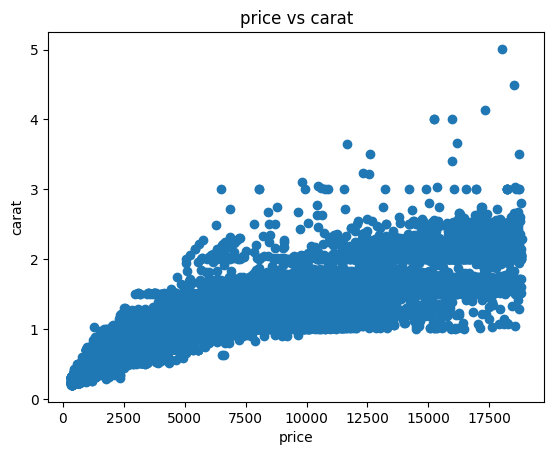

In [ ]:
plt.scatter(df['price'],df['carat'])
plt.xlabel('price')
plt.ylabel('carat')
plt.title('price vs carat')

#setting Up Variables for Regression
Declare y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation.

In [ ]:
y =df['price']
X_baseline = df[['carat']]

# creating and fitting simplle linear regression

In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function

# Assuming X_baseline should be used here instead of X
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate and interpret baseline model results

In [ ]:
# import files for mse,mae and rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict = model.predict(x_baseline.values.reshape(-1, 1))
mse = mean_squared_error(y, y_predict) # fixed the typo by changing mean_squared_array to mean_squared_error
r2 = r2_score(y, y_predict)
print('MSE:', mse)
print('R2:', r2)


NameError: name 'x_baseline' is not defined

In [ ]:
# import files for mse,mae and rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Change 'x_baseline' to 'X_baseline'
y_predict = model.predict(X_baseline.values.reshape(-1, 1))
mse = mean_squared_error(y, y_predict) # fixed the typo by changing mean_squared_array to mean_squared_error
r2 = r2_score(y, y_predict)
print('MSE:', mse)
print('R2:', r2)

MSE: 2398009.528743209
R2: 0.849327103401493


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1009.50
Mean Squared Error (MSE): 2401388.65
Root Mean Squared Error (RMSE): 1549.64
R² Score: 0.85


# 4. Prepare a Categorical Feature for Multiple Regression Modeling

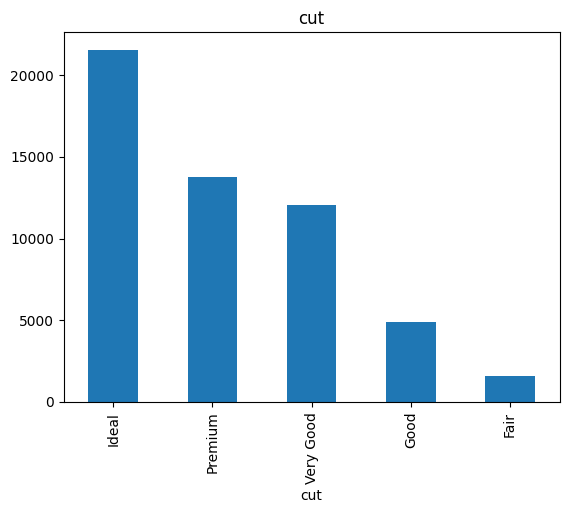

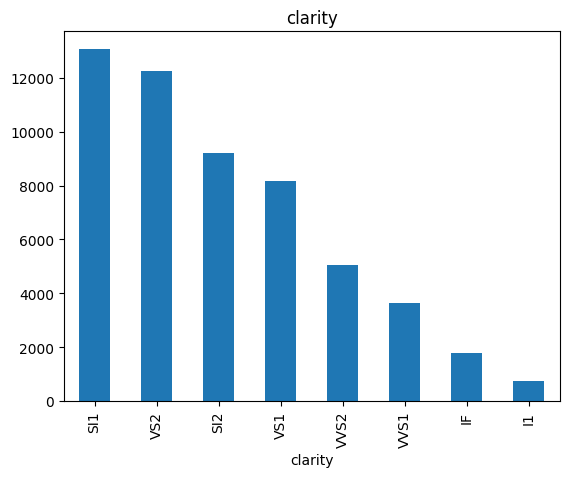

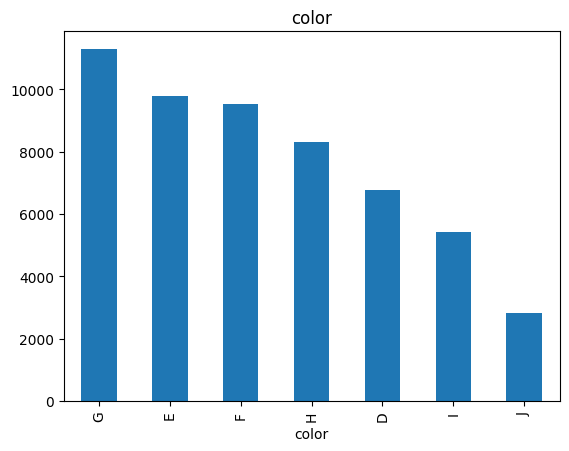

In [ ]:
# Below we create bar graphs for the categories present in each categorical feature:
cat_cols = ['cut', 'clarity','color'] # Define cat_cols to hold the list of categorical columns
for col in cat_cols:
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

# 5. preprocessing categorical variablePreprocessing Categorical Variable
If we tried to pass X_iterated as-is into sm.OLS, we would get an error.

We need to use pd.get_dummies to create dummy variables for cat_col.

DO NOT use drop_first=True, so that you can intentionally set a meaningful reference category instead*

In [ ]:
cat_cols = ['cut', 'clarity','color']
X_iterated = pd.get_dummies(df, columns=cat_cols)
X_iterated.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df = df.drop(columns=['Unnamed: 0'])


# drop other columns for refernce

In [ ]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [ ]:
# drop cut_ideal from x_iterated

X_iterated = X_iterated.drop(columns=['cut_Very Good'])

In [ ]:
df['clarity'].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [ ]:
# drop the clarity
X_iterated = X_iterated.drop(columns=['clarity_SI1'])

In [ ]:
df['color'].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [ ]:
X_iterated = X_iterated.drop(columns=['color_J'])

In [ ]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --clear-output --inplace your_notebook_name.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook_name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec